In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, foldnorm
def gauss(x, m, s):
    return np.exp(-((x-m)/s)**2*0.5)/np.sqrt(2*np.pi*s**2)

In [2]:
f_true = torch.load('../../Atomistic_experiments/materials_model_predictions/H2O/H2O_eval_forces/test_true_forces.pt').numpy() * -1  # these are gradients
f_ens = torch.load('../../Atomistic_experiments/materials_model_predictions/H2O/H2O_eval_forces/test_pred_forces.pt').detach().numpy() * -1 # these are gradients
f_pred = f_ens.mean(axis=0)

In [3]:
f_std = f_ens.std(axis=0)

In [4]:
true_kde = gaussian_kde(f_true[:,0])
ens_kde =  gaussian_kde((f_ens[:,:,0]).flatten())

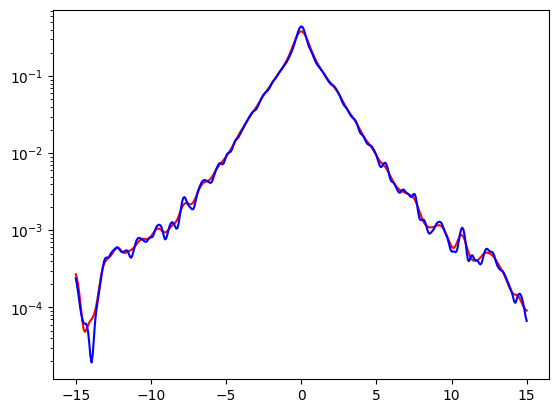

In [5]:
xgrid = np.linspace(-15,15,400)

plt.semilogy(xgrid,true_kde(xgrid), 'r-')
plt.semilogy(xgrid,ens_kde(xgrid), 'b-')

In [6]:
isel = np.where((0.08<f_std) & (f_std<0.1))[0]
true_kde_sel_a = gaussian_kde(f_true[isel,0]-f_pred[isel,0])
ens_kde_sel_a =  gaussian_kde((f_ens[:,isel,0]-f_pred[np.newaxis,isel,0]).flatten())

(0.0001, 10)

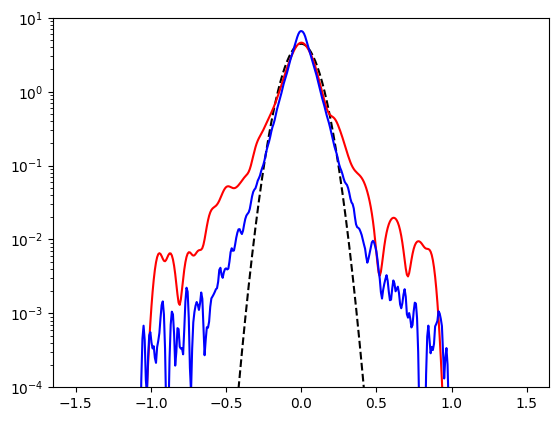

In [7]:
xgrid = np.linspace(-1.5,1.5,400)

plt.semilogy(xgrid,gauss(xgrid,0,0.09), 'k--')
plt.semilogy(xgrid,true_kde_sel_a(xgrid), 'r-')
plt.semilogy(xgrid,ens_kde_sel_a(xgrid), 'b-')
plt.ylim(1e-4,10)

In [8]:
np.mean(f_std)

0.040612175660562556

In [9]:
isel = np.where((0.018<f_std) & (f_std<0.022))[0]
true_kde_sel_b = gaussian_kde(f_true[isel,0]-f_pred[isel,0])
ens_kde_sel_b =  gaussian_kde((f_ens[:,isel,0]-f_pred[np.newaxis,isel,0]).flatten())

(0.0005, 50)

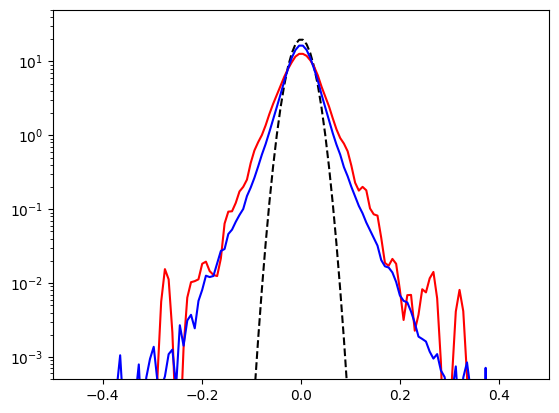

In [10]:
xgrid = np.linspace(-1.5,1.5,400)

plt.semilogy(xgrid,gauss(xgrid,0,0.02), 'k--')
plt.semilogy(xgrid,true_kde_sel_b(xgrid), 'r-')
plt.semilogy(xgrid,ens_kde_sel_b(xgrid), 'b-')
plt.xlim(-0.5,0.5)
plt.ylim(5e-4,50)

In [11]:
import matplotlib

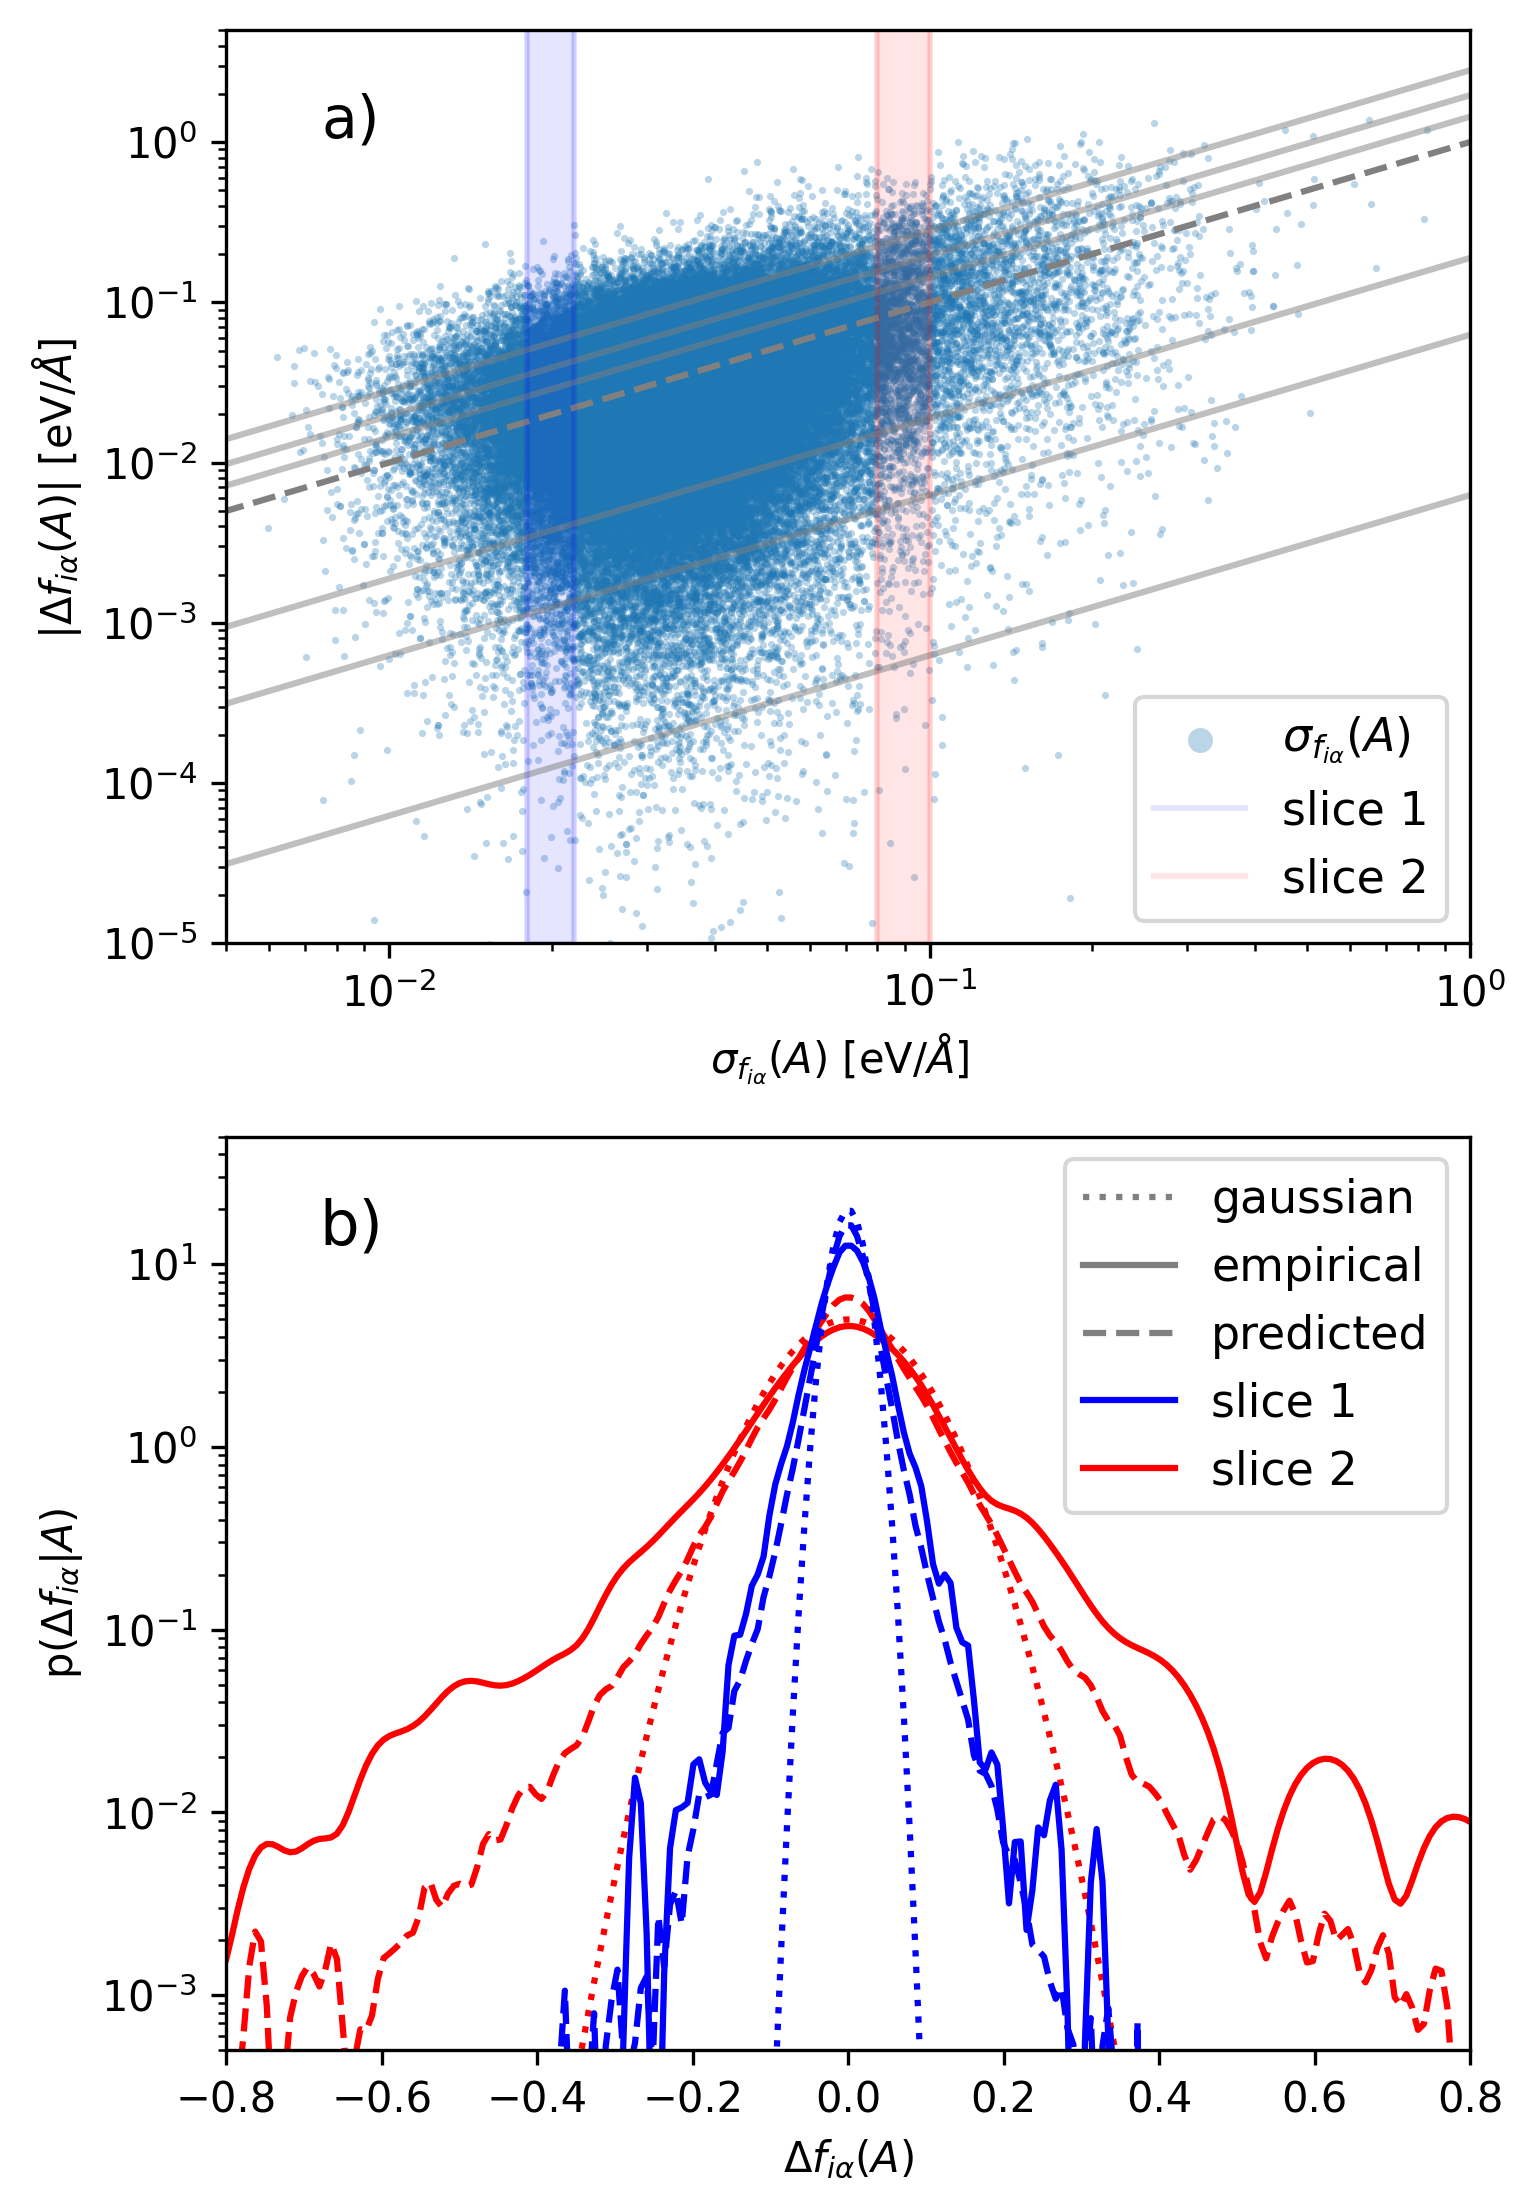

In [12]:
xgrid = np.linspace(-1.5,1.5,400)
fig, ax = plt.subplots(2,1,figsize=(5.25,7.5), dpi=300)

z_forces = np.abs(f_pred - f_true).flatten()

plt.rc('axes', labelsize=13.5)
plt.rcParams.update({'font.size': 11.0})
matplotlib.rc('xtick', labelsize=12.0) 
matplotlib.rc('ytick', labelsize=12.0) 
plt.rc('axes', labelsize=15.)

x = np.linspace(2e-5, 5e0, 5)

noise_level_2 = np.abs(x)
quantiles_lower_01 = [foldnorm.ppf(0.15, 0.,0.,i) for i in noise_level_2]
quantiles_upper_01 = [foldnorm.ppf(0.85, 0.,0.,i) for i in noise_level_2]
quantiles_lower_05 = [foldnorm.ppf(0.05, 0.,0.,i) for i in noise_level_2]
quantiles_upper_05 = [foldnorm.ppf(0.95, 0.,0.,i) for i in noise_level_2]
quantiles_lower_005 = [foldnorm.ppf(0.005, 0.,0.,i) for i in noise_level_2]
quantiles_upper_005 = [foldnorm.ppf(0.995, 0.,0.,i) for i in noise_level_2]

ax[0].scatter(f_std, z_forces,  s=3., alpha=0.3, color="tab:blue", rasterized=True, linewidth=0.)
#plt.scatter(std_forces_surface, z_forces_surface,  s=3., alpha=0.3, color="tab:orange", rasterized=True, linewidth=0.)
ax[0].scatter([],[], label=r"$\sigma_{f_{i\alpha}}(A)$", alpha=0.3, color="tab:blue", rasterized=True, linewidth=0.)
ax[0].loglog()
ax[0].plot(x, quantiles_upper_05, color='gray', alpha=0.5)
ax[0].plot(x, quantiles_lower_05, color='gray', alpha=0.5)
ax[0].plot(x, quantiles_upper_01, color='gray', alpha=0.5)
ax[0].plot(x, quantiles_lower_01, color='gray', alpha=0.5)
ax[0].plot(x, quantiles_upper_005, color='gray', alpha=0.5)
ax[0].plot(x, quantiles_lower_005, color='gray', alpha=0.5)

ax[0].plot(np.logspace(-3,0.5),np.logspace(-3,0.5),linestyle="--", color="grey")
ax[0].set_xlim(5e-3,1e0)
ax[0].set_ylim(1e-5,5e0)


ax[0].set_xlabel(r"$\sigma_{f_{i\alpha}}(A)$ [eV/$\AA$]  ")
ax[0].set_ylabel(r"$|\Delta f_{i\alpha}(A)|$ [eV/$\AA$] ")

x1, x2 = 0.018, 0.022

ax[0].axvline(x=x1, color='b', linestyle='-', label='slice 1', alpha=0.1)
ax[0].axvline(x=x2, color='b', linestyle='-', alpha=0.1)

# Color the area between the vertical lines
ymin, ymax = ax[0].get_ylim()
ax[0].fill_betweenx([ymin, ymax], x1, x2, color='b', alpha=0.1)

x1, x2 = 0.08, 0.1

ax[0].axvline(x=x1, color='r', linestyle='-',  alpha=0.1,label='slice 2',)
#ax[0].plot([],[], color='r', linestyle='-', )
ax[0].axvline(x=x2, color='r', linestyle='-', alpha=0.1)

ymin, ymax = ax[0].get_ylim()
ax[0].fill_betweenx([ymin, ymax], x1, x2, color='r', alpha=0.1)
ax[0].legend(loc="lower right")
ax[0].text(0.1, 0.9, 'a)', horizontalalignment='center', verticalalignment='center', transform=ax[0].transAxes, fontsize=14)


ax[1].semilogy(xgrid,gauss(xgrid,0,0.08), 'r:')
ax[1].semilogy(xgrid,true_kde_sel_a(xgrid), 'r-')
ax[1].semilogy(xgrid,ens_kde_sel_a(xgrid), 'r--')
ax[1].semilogy(xgrid,gauss(xgrid,0,0.02), 'b:')
ax[1].semilogy(xgrid,true_kde_sel_b(xgrid), 'b-')
ax[1].semilogy(xgrid,ens_kde_sel_b(xgrid), 'b--')
ax[1].set_xlim(-0.8,0.8)
ax[1].set_ylim(5e-4,50)
ax[1].set_xlabel(r'$\Delta f_{i\alpha}(A)$')
ax[1].set_ylabel(r'p($\Delta f_{i\alpha}|A$)')

ax[1].plot([],[], color="grey", linestyle=":", label="gaussian")
ax[1].plot([],[], color="grey", linestyle="-", label="empirical")
ax[1].plot([],[], color="grey", linestyle="--", label="predicted")
ax[1].plot([],[], color="b", linestyle="-", label="slice 1")
ax[1].plot([],[], color="r", linestyle="-", label="slice 2")


ax[1].legend(loc="upper right")
ax[1].text(0.1, 0.9, 'b)', horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, fontsize=15)

plt.tight_layout()
fig.savefig("error_forces_distribution_forces.pdf", bbox_inches='tight', dpi=300)
